In [1]:
import sys
#sys.path.append("/home1/09528/sumbarger/simulation_analysis_tools/")  
### The line below is for working on this locally. Delete when back on stampede
sys.path.append("/Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/Stampede/simulation_analysis_tools/")
import numpy as np
import math
import gizmo_analysis as gizmo  
import utilities as ut
from matplotlib import pylab as plt
from matplotlib.colors import LogNorm
from scipy import stats
from matplotlib import pyplot
import pickle
import matplotlib.patches as patches
from fof_analysis import fof
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

### Uncomment for making graphs more readable
#font = {'size'   : 20}
#matplotlib.rc('font', **font)
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
#matplotlib.rcParams['figure.dpi'] = 300

#Lines below ensure that we can visualize all rows and columns in large data frames
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)

In [2]:
b_parsec    = 4 #mess with this
b_kpc       = b_parsec / 1000.
ncut_min    = 5 
age_cut_Myr = 3 #Myr
age_cut_Gyr = age_cut_Myr / 1000. #Gyr
softening   = 4. #res 7100
snaps = np.arange(640,643,1)
snap644 = 644

simname     = 'm12m_res7100'
#simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12m_r7100/mhdcv/1Myr'
#simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr' #simdir that works for m12m but not accurate
#simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12m_r7100/mhdcv/1Myr/'
#simdir     = '/scratch/projects/xsede/GalaxiesOnFIRE/cr_suite/m12i_r7100/mhdcv/1Myr/fire2/'
### The line below is for working locally
simdir      = '/Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/sims/m12i_res7100'

In [3]:
part640 = gizmo.io.Read.read_snapshots(['star', 'gas'],'index', snaps[0], simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)


# in utilities.simulation.Snapshot():
* reading:  Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/sims/m12i_res7100/snapshot_times.txt

  using snapshot index = 640, redshift = 0.004


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/stevenumbarger/Research/Sarah/Jupyter_notebooks/GMC_project/sims/m12i_res7100/output/snapshot_640/snapshot_640.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 55650202 particles
    star      (id = 4): 15338362 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']
  gas properties: ['acceleration', 'density', 'electron.fraction', 'hydrogen.neutral.fraction', 'id', 'id.child', 'id.generation', 'magnetic.field', 'mass', 'massfraction', 'photon.energy', 'position', 'potential', 'sfr', 'size', 'temperature', 'velocity']

* reading particles from:
    snapshot_

In [4]:
#Loading snapshot 640 data into arrays

x_640             = part640['star'].prop('host.distance.principal.cartesian')[:,0]
y_640             = part640['star'].prop('host.distance.principal.cartesian')[:,1]
z_640             = part640['star'].prop('host.distance.principal.cartesian')[:,2]
rxyz_640          = part640['star'].prop('host.distance.total')
vx_640            = part640['star'].prop('host.velocity.principal.cartesian')[:,0]
vy_640            = part640['star'].prop('host.velocity.principal.cartesian')[:,1]
vz_640            = part640['star'].prop('host.velocity.principal.cartesian')[:,2]
age_640           = part640['star'].prop('age')
mass_640          = part640['star'].prop('mass')
feh_640           = part640['star'].prop('metallicity.fe')
ids_640           = part640['star']['id']
id_generation640  = part640['star']['id.generation']
id_child640       = part640['star']['id.child']

In [5]:
#indices of stars we want to run fof on (to find star clusters)
si = np.where((age_640 <= age_cut_Gyr) & (rxyz_640 < 20) & (abs(z_640) < 1.5))
#Run fof
ind, xcm, ycm, zcm, mtot, grpid, r90, r50, rmax =fof.find(x_640[si],y_640[si],z_640[si], b=b_kpc, mass=mass_640[si], ncut=ncut_min)

linking length  0.004
min number particles in group  5
0.02405381202697754 seconds
number of groups 4
max number in a group 8


In [6]:
#This is only for young stars at snapshot_640
xyoungstars    = x_640[si]
yyoungstars    = y_640[si]
zyoungstars    = z_640[si]
ageyoungstars  = age_640[si]*1000. #age in Myr
massyoungstars = mass_640[si]
idsyoungstars  = ids_640[si]

vxyoungstars   = vx_640[si]
vyyoungstars   = vy_640[si]
vzyoungstars   = vz_640[si]

In [7]:
#Saving information for each of the 4 clusters found at step 640
x_singlecluster_1    = xyoungstars[ind[0]] 
y_singlecluster_1    = yyoungstars[ind[0]]
z_singlecluster_1    = zyoungstars[ind[0]]
vx_singlecluster_1   = vxyoungstars[ind[0]]
vy_singlecluster_1   = vyyoungstars[ind[0]]
vz_singlecluster_1   = vzyoungstars[ind[0]]
age_singlecluster_1  = ageyoungstars[ind[0]]
mass_singlecluster_1 = massyoungstars[ind[0]]
ids_singlecluster_1  = idsyoungstars[ind[0]]    
xcm_singlecluster_1  = xcm[0]
ycm_singlecluster_1  = ycm[0]
zcm_singlecluster_1  = zcm[0]
mtot_singlecluster_1 = mtot[0]
grpid_singlcluster_1 = grpid[0]
r90_singlecluster_1  = r90[0]
r50_singlecluster_1  = r50[0]
rmax_singlecluster_1 = rmax[0]

x_singlecluster_2    = xyoungstars[ind[1]] 
y_singlecluster_2    = yyoungstars[ind[1]]
z_singlecluster_2    = zyoungstars[ind[1]]
vx_singlecluster_2   = vxyoungstars[ind[1]]
vy_singlecluster_2   = vyyoungstars[ind[1]]
vz_singlecluster_2   = vzyoungstars[ind[1]]
age_singlecluster_2  = ageyoungstars[ind[1]]
mass_singlecluster_2 = massyoungstars[ind[1]]
ids_singlecluster_2  = idsyoungstars[ind[1]]    
xcm_singlecluster_2  = xcm[1]
ycm_singlecluster_2  = ycm[1]
zcm_singlecluster_2  = zcm[1]
mtot_singlecluster_2 = mtot[1]
grpid_singlcluster_2 = grpid[1]
r90_singlecluster_2  = r90[1]
r50_singlecluster_2  = r50[1]
rmax_singlecluster_2 = rmax[1]

x_singlecluster_3    = xyoungstars[ind[2]] 
y_singlecluster_3    = yyoungstars[ind[2]]
z_singlecluster_3    = zyoungstars[ind[2]]
vx_singlecluster_3   = vxyoungstars[ind[2]]
vy_singlecluster_3   = vyyoungstars[ind[2]]
vz_singlecluster_3   = vzyoungstars[ind[2]]
age_singlecluster_3  = ageyoungstars[ind[2]]
mass_singlecluster_3 = massyoungstars[ind[2]]
ids_singlecluster_3  = idsyoungstars[ind[2]]    
xcm_singlecluster_3  = xcm[2]
ycm_singlecluster_3  = ycm[2]
zcm_singlecluster_3  = zcm[2]
mtot_singlecluster_3 = mtot[2]
grpid_singlcluster_3 = grpid[2]
r90_singlecluster_3  = r90[2]
r50_singlecluster_3  = r50[2]
rmax_singlecluster_3 = rmax[2]

x_singlecluster_4    = xyoungstars[ind[3]] 
y_singlecluster_4    = yyoungstars[ind[3]]
z_singlecluster_4    = zyoungstars[ind[3]]
vx_singlecluster_4   = vxyoungstars[ind[3]]
vy_singlecluster_4   = vyyoungstars[ind[3]]
vz_singlecluster_4   = vzyoungstars[ind[3]]
age_singlecluster_4  = ageyoungstars[ind[3]]
mass_singlecluster_4 = massyoungstars[ind[3]]
ids_singlecluster_4  = idsyoungstars[ind[3]]    
xcm_singlecluster_4  = xcm[3]
ycm_singlecluster_4  = ycm[3]
zcm_singlecluster_4  = zcm[3]
mtot_singlecluster_4 = mtot[3]
grpid_singlcluster_4 = grpid[3]
r90_singlecluster_4  = r90[3]
r50_singlecluster_4  = r50[3]
rmax_singlecluster_4 = rmax[3]

In [8]:
position = part640['gas'].prop('host.distance.principal') #setting variable for position
index = np.where(part640['gas'].prop('temperature') < 10**3)
gas_x640 = position[index][:,0] # the x position
gas_y640 = position[index][:,1] # the y position
gas_z640 = position[index][:,2] # the z position

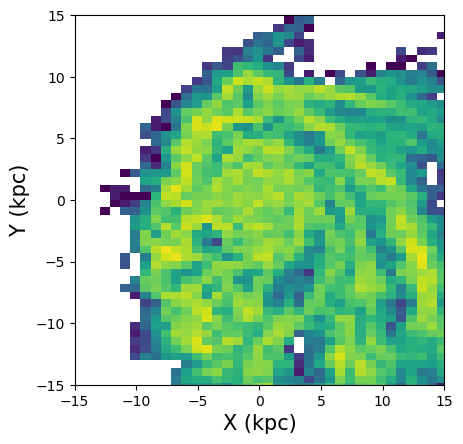

In [9]:
plt.style.use('default') #makes the background the default python

my_size = 15
fig1, ax = plt.subplots()

### Gas cells
ax.hist2d(gas_x640, gas_y640, bins=22000, norm=LogNorm(), cmap='viridis') #make first 2D histogram

ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-15, 15]) #sets x limit at -15 to 15
ax.set_ylim([-15, 15]) #sets y limit at -15 to 15

plt.show() #shows plot

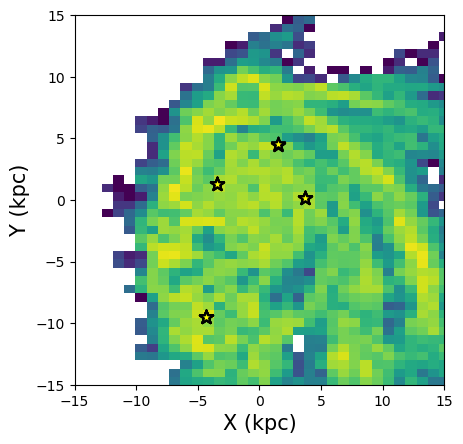

In [10]:
plt.style.use('default') #makes the background the default python

my_size = 15
fig1, ax = plt.subplots()

### Gas cells
ax.hist2d(gas_x640, gas_y640, bins=20000, norm=LogNorm(), cmap='viridis') #make first 2D histogram

### 1st star cluster
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 2nd star cluster
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 4th star cluster
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)

ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([-15, 15]) #sets x limit at -15 to 15
ax.set_ylim([-15, 15]) #sets y limit at -15 to 15

plt.show() #shows plot

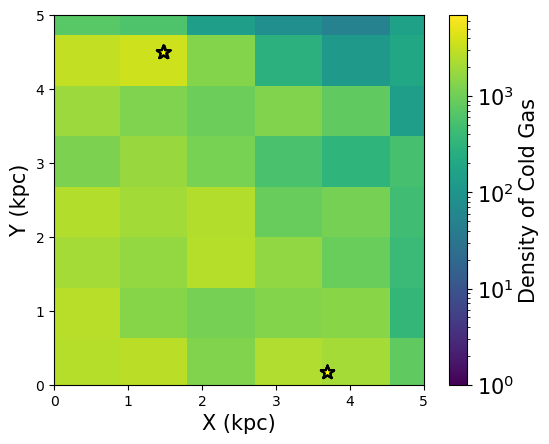

In [10]:
plt.style.use('default') #makes the background the default python

my_size = 15
fig1, ax = plt.subplots()

gas_density = part640['gas'].prop('density')

### Gas cells
gas_hist = ax.hist2d(gas_x640, gas_y640, bins=20000, norm=LogNorm(), cmap='viridis') #make first 2D histogram

### 1st star cluster
    
ax.scatter(x_singlecluster_1, y_singlecluster_1, facecolor="yellow", s=100, alpha=1, marker=r'*', 
           label="star cluster", edgecolor='black', linewidth=1.5)


### 2nd star cluster
    
ax.scatter(x_singlecluster_2, y_singlecluster_2, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 3rd star cluster
    
ax.scatter(x_singlecluster_3, y_singlecluster_3, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)


### 4th star cluster
    
ax.scatter(x_singlecluster_4, y_singlecluster_4, facecolor="yellow", s=100, alpha=1, marker=r'*', 
            edgecolor='black', linewidth=1.5)

ax.set_xlabel("X (kpc)", fontsize = my_size) #sets x axis label
ax.set_ylabel("Y (kpc)", fontsize = my_size) #sets y axis label

# Create colorbar based on the density of the gas
cbar = plt.colorbar(gas_hist[3], ax=ax)  # Using the colorbar associated with the 2D histogram
cbar.set_label('Density of Cold Gas', fontsize=my_size)
cbar.ax.tick_params(labelsize=my_size)

ax.set_aspect('equal') #sets apsect ratio to be equal

ax.set_xlim([0, 5]) #sets x limit at 0 to 5
ax.set_ylim([0, 5]) #sets y limit at 0 to 5

plt.show() #shows plot

In [11]:
part640['gas'].keys()

dict_keys(['acceleration', 'position', 'density', 'electron.fraction', 'temperature', 'magnetic.field', 'mass', 'massfraction', 'hydrogen.neutral.fraction', 'id.child', 'id.generation', 'id', 'photon.energy', 'potential', 'size', 'sfr', 'velocity'])